# Clasificación de Vinos con Árboles de Decisión

Este notebook implementa un modelo de **Machine Learning** utilizando **Árboles de Decisión** para clasificar vinos según sus características químicas.

## Objetivo
Entrenar un clasificador que pueda identificar el tipo de vino basándose en 13 atributos químicos como el contenido de alcohol, acidez, color, etc.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

## 1. Importación de Librerías

Importamos las bibliotecas necesarias:
- **NumPy** y **Pandas**: Manipulación de datos
- **Seaborn** y **Matplotlib**: Visualización
- **Scikit-learn**: Algoritmos de Machine Learning

In [2]:
(X, Y) = datasets.load_wine(return_X_y=True, as_frame=True)

## 2. Carga del Dataset

Cargamos el dataset de vinos de scikit-learn. Este dataset contiene:
- **X**: 13 características químicas de los vinos
- **Y**: Etiquetas que representan 3 tipos diferentes de vinos

El parámetro `as_frame=True` permite obtener los datos como DataFrames de pandas.

In [3]:
print('Shape of X:', X.shape)

Shape of X: (178, 13)


## 3. Exploración de Datos

### 3.1 Dimensiones del Dataset
Verificamos las dimensiones de nuestros datos para entender cuántas muestras y características tenemos.

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 3.2 Primeras Filas del Dataset
Visualizamos las primeras 5 filas para entender la estructura de los datos y los nombres de las características.

In [5]:
Y.shape

(178,)

### 3.3 Análisis de las Etiquetas (Variable Objetivo)

Exploramos la variable objetivo Y para entender cuántas muestras tenemos.

In [6]:
Y.groupby(Y).count()

target
0    59
1    71
2    48
Name: target, dtype: int64

### 3.4 Distribución de Clases
Verificamos la distribución de las 3 clases de vinos para detectar si hay desbalance en los datos.

In [8]:
from sklearn.tree import DecisionTreeClassifier

## 4. Preparación del Modelo

### 4.1 Importación del Clasificador
Importamos el algoritmo de Árbol de Decisión de scikit-learn.

In [9]:
tree_instance = DecisionTreeClassifier(max_depth=2)


### 4.2 Creación de la Instancia del Modelo
Creamos una instancia del árbol de decisión con profundidad máxima de 2 niveles:
- `max_depth=2`: Limita la profundidad del árbol para evitar sobreajuste
- Un árbol poco profundo es más interpretable pero menos preciso

In [10]:
X.sample(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0


### 4.3 Muestra de Datos
Visualizamos algunas muestras aleatorias para verificar que los datos estén correctamente cargados.

In [11]:
Y.sample(3)

47     0
154    2
22     0
Name: target, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

## 5. División de Datos

### 5.1 Train-Test Split
Dividimos los datos en conjuntos de entrenamiento y prueba:
- **75% entrenamiento**: Para que el modelo aprenda los patrones
- **25% prueba**: Para evaluar el rendimiento del modelo con datos no vistos
- `random_state=1`: Asegura que la división sea reproducible

In [13]:
tree_instance.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

## 6. Entrenamiento del Modelo

Entrenamos el árbol de decisión con los datos de entrenamiento. El método `fit()` construye el árbol aprendiendo las reglas de clasificación.

In [14]:
tree_instance.tree_.node_count

5

### 6.1 Análisis de la Estructura del Árbol
Contamos el número de nodos en el árbol para entender su complejidad.

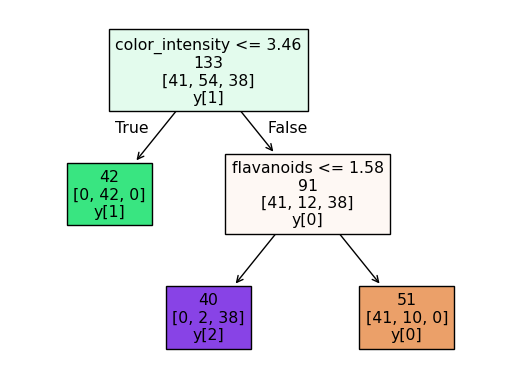

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(tree_instance, feature_names=X_train.columns, filled=True, class_names=True, label='none', impurity=False)
plt.show()

## 7. Visualización del Árbol de Decisión

Graficamos el árbol entrenado para visualizar:
- Las características utilizadas en cada división
- Las reglas de decisión en cada nodo
- Los colores representan las diferentes clases de vinos
- `filled=True`: Colorea los nodos según la clase predominante

In [16]:
ypred = tree_instance.predict(X_test)
ypred

array([2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0,
       0])

## 8. Predicciones

### 8.1 Realizar Predicciones
Utilizamos el modelo entrenado para predecir las etiquetas del conjunto de prueba.

In [17]:
print(X_test.iloc[0:2,[0,6]])
print("Etiquetas: ", ypred[0:2])

     alcohol  flavanoids
161    13.69        0.56
117    12.42        2.09
Etiquetas:  [2 1]


### 8.2 Análisis de Predicciones Específicas
Examinamos las primeras predicciones junto con sus características para entender cómo el modelo toma decisiones.

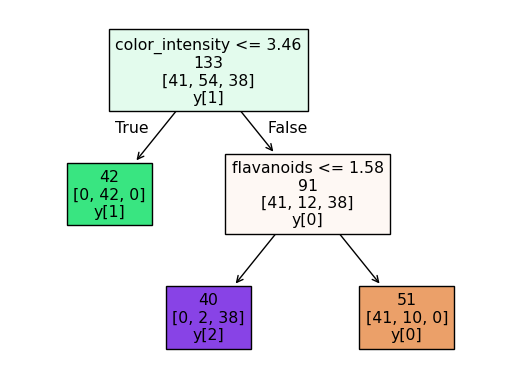

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(tree_instance, feature_names=X_train.columns, filled=True, class_names=True, label='none', impurity=False)
plt.show()

## 9. Evaluación del Modelo

### 9.1 Precisión (Accuracy)
Calculamos la precisión del modelo comparando las predicciones con las etiquetas reales del conjunto de prueba.

La precisión nos indica el porcentaje de predicciones correctas sobre el total de predicciones.

In [24]:
# Calcular accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, ypred)

# Mostrar resultados detallados
print("="*50)
print("ANÁLISIS DE ACCURACY DEL MODELO")
print("="*50)
print(f"\n📊 Accuracy (Precisión): {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\n🎯 Predicciones correctas: {(ypred == Y_test).sum()} de {len(Y_test)}")
print(f"❌ Predicciones incorrectas: {(ypred != Y_test).sum()} de {len(Y_test)}")
print(f"\n📈 Tasa de acierto: {accuracy*100:.2f}%")
print(f"📉 Tasa de error: {(1-accuracy)*100:.2f}%")
print("="*50)

ANÁLISIS DE ACCURACY DEL MODELO

📊 Accuracy (Precisión): 0.9111 (91.11%)

🎯 Predicciones correctas: 41 de 45
❌ Predicciones incorrectas: 4 de 45

📈 Tasa de acierto: 91.11%
📉 Tasa de error: 8.89%


### 9.2 Análisis Detallado por Clase

Veamos cómo se desempeña el modelo para cada tipo de vino individualmente:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reporte de clasificación completo
print("REPORTE DE CLASIFICACIÓN DETALLADO")
print("="*60)
print(classification_report(Y_test, ypred, target_names=['Clase 0', 'Clase 1', 'Clase 2']))

# Matriz de confusión
print("\nMATRIZ DE CONFUSIÓN")
print("="*60)
cm = confusion_matrix(Y_test, ypred)
print(cm)
print("\nInterpretación:")
print("- Filas: Clases reales")
print("- Columnas: Clases predichas")
print("- Diagonal: Predicciones correctas")

### 9.3 Visualización de la Matriz de Confusión

La matriz de confusión nos muestra gráficamente dónde el modelo comete errores:

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'],
            cbar_kws={'label': 'Número de muestras'})
plt.title('Matriz de Confusión - Árbol de Decisión', fontsize=14, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

### 9.4 Comparación de Predicciones

Visualicemos algunas predicciones correctas e incorrectas:

In [ ]:
# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Clase Real': Y_test.values,
    'Clase Predicha': ypred,
    'Correcto': Y_test.values == ypred
})

print("📊 RESUMEN DE RESULTADOS:")
print("\n✅ Predicciones CORRECTAS:")
print(resultados[resultados['Correcto'] == True].head(10))

print("\n\n❌ Predicciones INCORRECTAS:")
incorrectas = resultados[resultados['Correcto'] == False]
if len(incorrectas) > 0:
    print(incorrectas)
else:
    print("¡No hay predicciones incorrectas! Accuracy del 100%")

## 10. Conclusiones

### Interpretación de Resultados

- **Accuracy**: Representa el porcentaje total de clasificaciones correctas
- **Precision**: Qué tan precisas son las predicciones positivas para cada clase
- **Recall**: Qué proporción de cada clase fue correctamente identificada
- **F1-Score**: Media armónica entre precision y recall

### Ventajas del Modelo
✅ Alta interpretabilidad: fácil de visualizar y explicar
✅ Entrenamiento rápido
✅ Buena precisión con solo 2 niveles de profundidad

### Limitaciones
⚠️ Profundidad limitada (max_depth=2) puede perder patrones complejos
⚠️ Sensible a desbalanceo de datos
⚠️ Puede variar según la división train-test

### Próximos Pasos
- Experimentar con diferentes valores de `max_depth`
- Probar con Random Forest para mejorar la precisión
- Implementar validación cruzada
- Analizar feature importance